In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")
print(df.shape)
df.tail()

(200, 5)


,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [3]:
df=df[["TV", "radio", "newspaper", "sales"]]
df.tail()
df.shape

(200, 4)

In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
corr = df.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


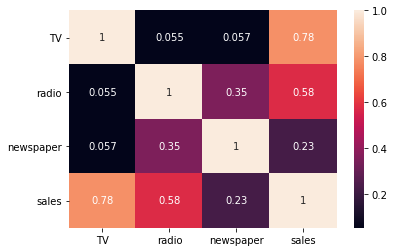

In [6]:
sns.heatmap(corr, annot = True)

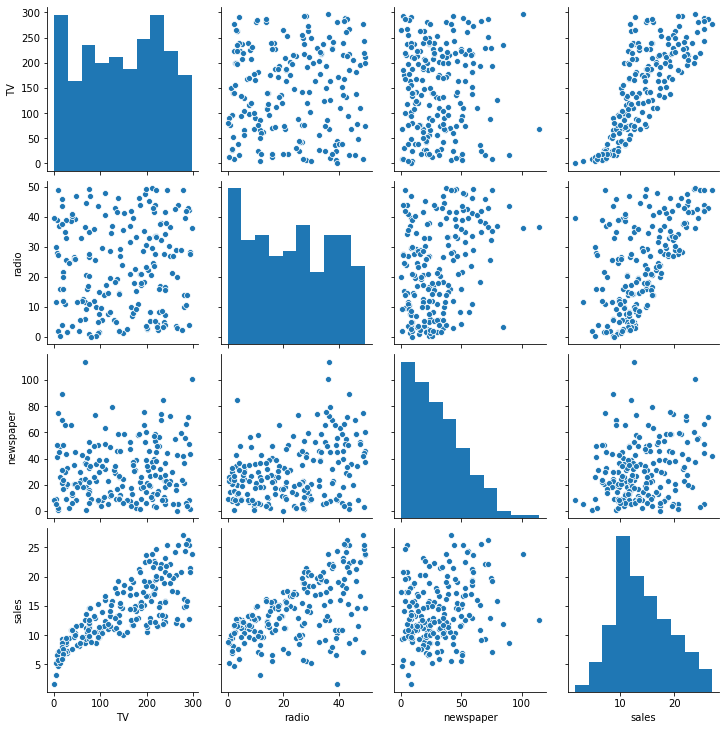

In [7]:
sns.pairplot(df[["TV", "radio", "newspaper", "sales"]])

In [8]:
df_y = df["sales"]
df_x = df[["TV", "radio", "newspaper"]]

In [9]:
df_y.shape, df_x.shape

((200,), (200, 3))

In [10]:
df_x.tail()

,TV,radio,newspaper
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


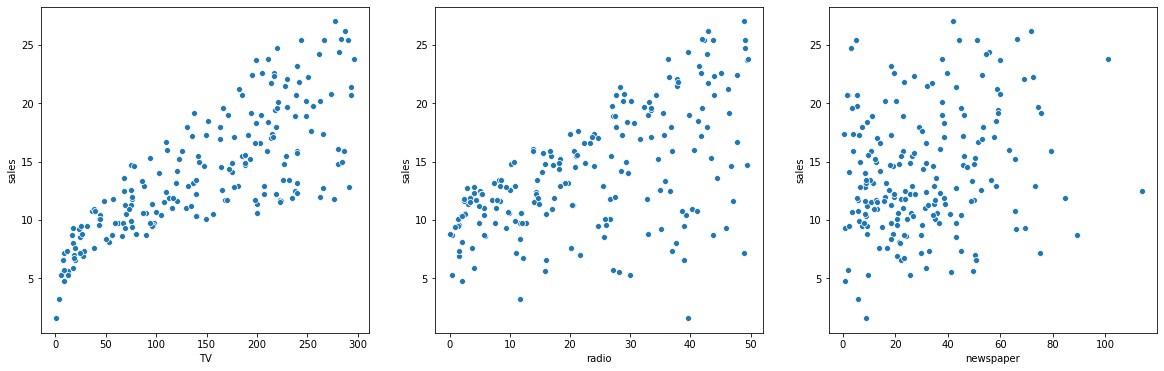

In [11]:
figure, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols =3)

figure.set_size_inches(20,6)

sns.scatterplot(data = df, x= "TV", y="sales", ax= ax1)
sns.scatterplot(data = df, x= "radio", y="sales", ax= ax2)
sns.scatterplot(data = df, x= "newspaper", y="sales", ax=ax3)

#### * TV가 매출액과 가장 관련이 높은 것 같아 보임. 라디오도 상관관계가 있지만 신문의 상관관계는 확실하지 않아보임.

In [18]:
import statsmodels.formula.api as sm

model1 = sm.ols(formula = 'sales ~ TV + radio + newspaper',data = df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.58e-96
Time:                        09:14:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

####    * P-value 0.05 수준에서 유의한 변수는 tv, radio.
####    * 회귀식은 sales = 2.389 + 0.0458TV + 0.1885radio -0.001newspaper

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(df_x, df_y)
print(model.intercept_, model.coef_)

2.9388893694594085 [ 0.04576465  0.18853002 -0.00103749]


In [27]:
model1 = sm.ols(formula = 'sales ~ TV+radio+newspaper', data = df).fit()
model2 = sm.ols(formula = 'sales ~ TV+radio', data = df).fit()
model3 = sm.ols(formula = 'sales ~ TV', data = df).fit()

print(model1.summary())
print(model2.summary())
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.58e-96
Time:                        09:25:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

####  * newspaper 를 제거한 model2dml AIC, BIC가 가장 낮음
####  * 신문광고와 매출액은 관련이 없어 보임

In [28]:
model1.predict({"TV" : 300, "radio" : 10, "newspaper" : 10000})

0    8.178653
dtype: float64

In [29]:
model1.predict({"TV" : 300, "radio" : 10, "newspaper" : 10})

0    18.543208
dtype: float64

In [38]:
model3.predict({"TV" : [ 100, 50, 150]})

0    11.786258
1     9.409426
2    14.163090
dtype: float64

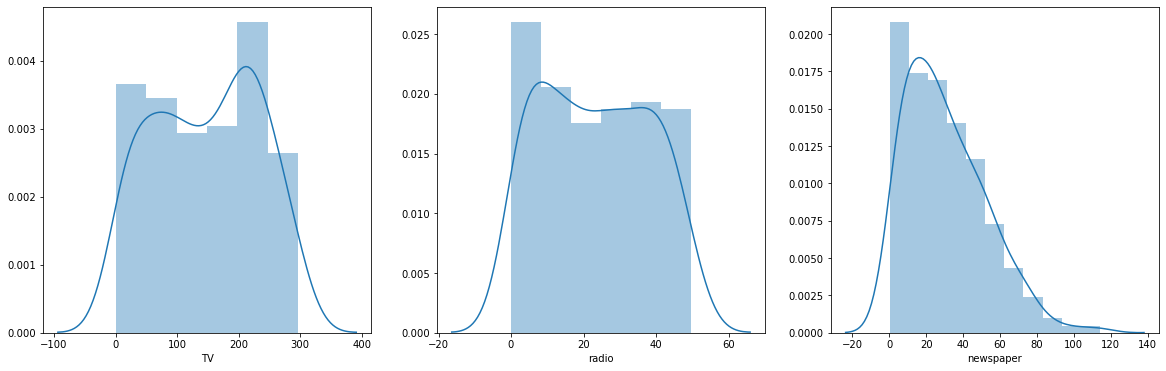

In [52]:
figure, ((ax1, ax2,ax3)) = plt.subplots(nrows =1, ncols= 3)
figure.set_size_inches(20,6)

sns.distplot(df["TV"], ax= ax1)

sns.distplot(df["radio"], ax= ax2)

sns.distplot(df["newspaper"], ax= ax3)

In [50]:
import numpy as np

df["log_newspaper"] = np.log(df["newspaper"]+1)
df[["log_newspaper", "newspaper"]]

,log_newspaper,newspaper
0,4.251348,69.2
1,3.830813,45.1
2,4.252772,69.3
3,4.085976,58.5
4,4.084294,58.4
...,...,...
195,2.694627,13.8
196,2.208274,8.1
197,2.001480,6.4
198,4.207673,66.2


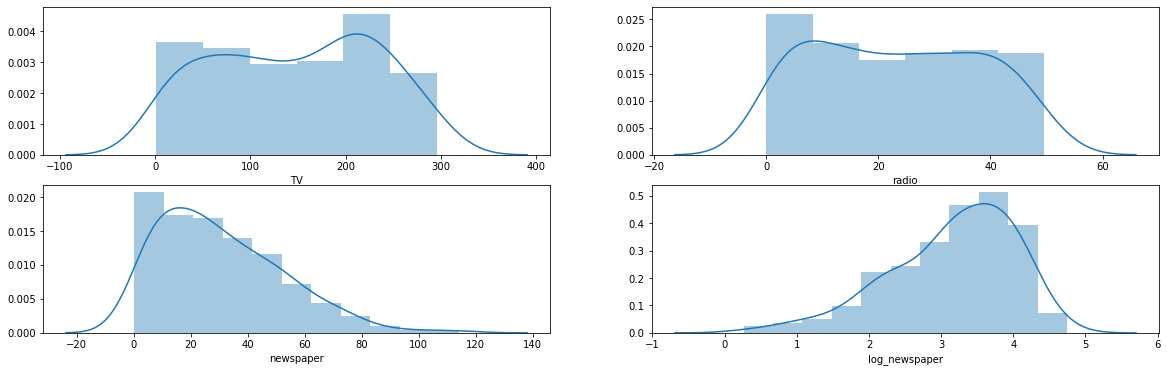

In [55]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)

figure.set_size_inches(20,6)

sns.distplot(df["TV"], ax= ax1)
sns.distplot(df["radio"], ax= ax2)
sns.distplot(df["newspaper"], ax= ax3)
sns.distplot(df["log_newspaper"], ax= ax4)

In [59]:
model1 = sm.ols(formula = "sales ~ TV+ radio+newspaper", data=df).fit()
model4 = sm.ols(formula = "sales ~ TV+ radio+log_newspaper", data=df).fit()

print(model1.summary())
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.58e-96
Time:                        09:54:50   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

### * 신문광고에 대한 상관계수는 양수로 변했지만 p-value는 0.05수준에서 유의하지 않음






### 1. 데이터분석 결과 신문광고는 유효하지 않음
### 2. 신문광고보다 TV, 라디오 광고 위주로 진행해야 함
### 3. 라디오 광고의 상관계수가 더 크므로 라디오 광고를 할 수 록 잘 팔리는 제품임